# Generating coeval boxes and lightcones

The majority of the functions for generating these two objects are the same, with the exception of the lightcone class having the extra attribute Lightconer (the lightconer object from 21cmFAST, required for plotting of the lightcone) and the plot_lightcone function; and the lightcone having a central redshift and redshift range, as opposed to the single input redshift for the box.  
Here, we demonstrate with a box.

In [1]:
from postEoR import generation as gen
import matplotlib.pyplot as plt
import numpy as np

We can specify the desired redshift (+ redshift range for the cone), the physical dimensions and number of cells, and the overdensity limit for inclusion of cells in halos.

In [3]:
box = gen.generate_box(5, 250, 40, connectivity=1, normalise_halos=False, max_rad=1, random_seed=1122)

inputs in
init conds in
box ran
Optimal overdensity cap used is 8.0
14033
crit dens 5.8160395484597314e-27
min mass of cell before halos 2666154280.9267735
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve


In [ ]:
print(np.mean(box.BT_field))

6.487053510597573e-05


We can plot colormaps, power spectra, halo mass functions etc. from the object itself.

# Halo mass functions

From the box, we plot its halo mass function. This is plotted alongside the theoretical, generated by the hmf package (Murray et al. 2013).

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/hmf/density_field/transfer_models.py:233: UserWarning: 'extrapolate_with_eh' was not set. Defaulting to True, which is different behaviour than versions <=3.4.4. This warning may be removed in v4.0. Silence it by setting extrapolate_with_eh explicitly.
  warnings.warn(


(array([1.00000000e+09, 1.20679264e+09, 1.45634848e+09, 1.75751062e+09,
        2.12095089e+09, 2.55954792e+09, 3.08884360e+09, 3.72759372e+09,
        4.49843267e+09, 5.42867544e+09, 6.55128557e+09, 7.90604321e+09,
        9.54095476e+09, 1.15139540e+10, 1.38949549e+10, 1.67683294e+10,
        2.02358965e+10, 2.44205309e+10, 2.94705170e+10, 3.55648031e+10,
        4.29193426e+10, 5.17947468e+10, 6.25055193e+10, 7.54312006e+10,
        9.10298178e+10, 1.09854114e+11, 1.32571137e+11, 1.59985872e+11,
        1.93069773e+11, 2.32995181e+11, 2.81176870e+11, 3.39322177e+11,
        4.09491506e+11, 4.94171336e+11, 5.96362332e+11, 7.19685673e+11,
        8.68511374e+11, 1.04811313e+12, 1.26485522e+12, 1.52641797e+12,
        1.84206997e+12, 2.22299648e+12, 2.68269580e+12, 3.23745754e+12,
        3.90693994e+12, 4.71486636e+12, 5.68986603e+12, 6.86648845e+12,
        8.28642773e+12, 1.00000000e+13]),
 array([   0,    0,    0,    0,    0, 3310, 1626,  320,   58, 1521,  866,
         651,  818, 

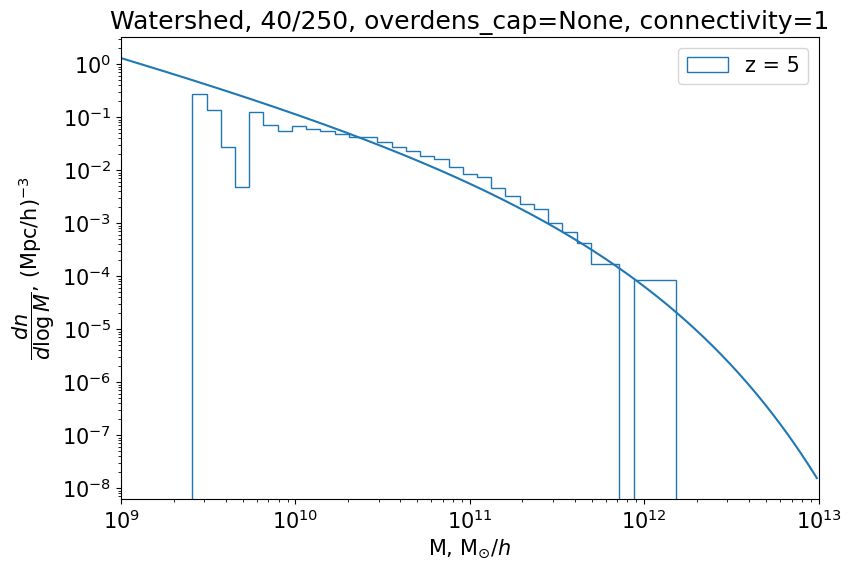

In [4]:
box.gen_hmf(title="Watershed, 40/250, overdens_cap=None, connectivity=1", Mmax=13, Mmin=9, no_bins=50)

#plt.ylim(1e-6, 1e-0)
#plt.xlim(1e12, 1e14)

Separately, we also can look at the evolution of the HMF with redshift.

In [ ]:
box = gen.generate_box(3, 250, 40, overdens_cap=6, connectivity=1, normalise_halos=False, max_rad=0)
box.gen_hmf(title="Watershed, 40/250, overdens_cap=6", Mmax=13, Mmin=10, color="tab:red", linestyle="--")
box = gen.generate_box(4, 250, 40, overdens_cap=6, connectivity=1, normalise_halos=False, max_rad=0)
box.gen_hmf(title="Watershed, 40/250, overdens_cap=6", Mmax=13, Mmin=10, color="tab:green", linestyle="--")
box = gen.generate_box(5, 250, 40, overdens_cap=6, connectivity=1, normalise_halos=False, max_rad=0)
box.gen_hmf(title="Watershed, 40/250, overdens_cap=6", Mmax=13, Mmin=10, color="tab:orange", linestyle="--")
box = gen.generate_box(6, 250, 40, overdens_cap=6, connectivity=1, normalise_halos=False, max_rad=0)
box.gen_hmf(title="Watershed, 40/250, overdens_cap=6", Mmax=13, Mmin=10, color="tab:blue", linestyle="--")
plt.ylim(1e-6, 1e-0)
plt.xlim(1e10, 1e13)
plt.show()

# Field slices

Below we plot a slice of the brightness temperature field. We may also do this for the halo field, using "halo" for the field parameter.

<Figure size 900x600 with 0 Axes>

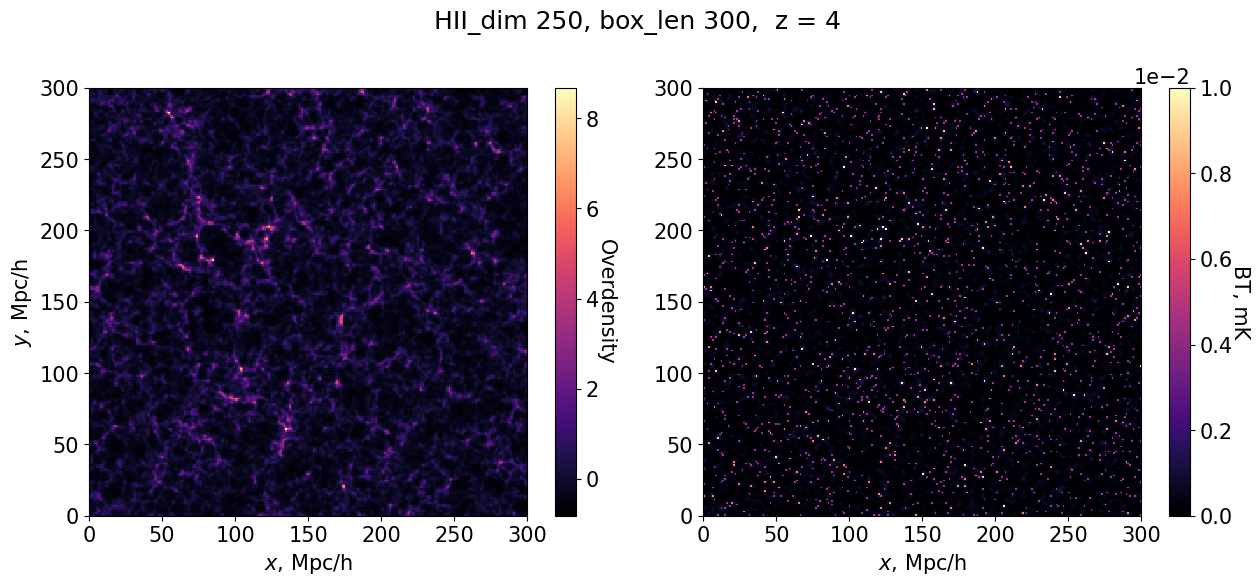

In [ ]:
box.plot_slice(field="BT", vmax=1e-2)

# Power spectra and bias

The bias may also be calculated, and plot separately using matplotlib.

Generated bins.
Generated bins.
Using input bins
Using input bins


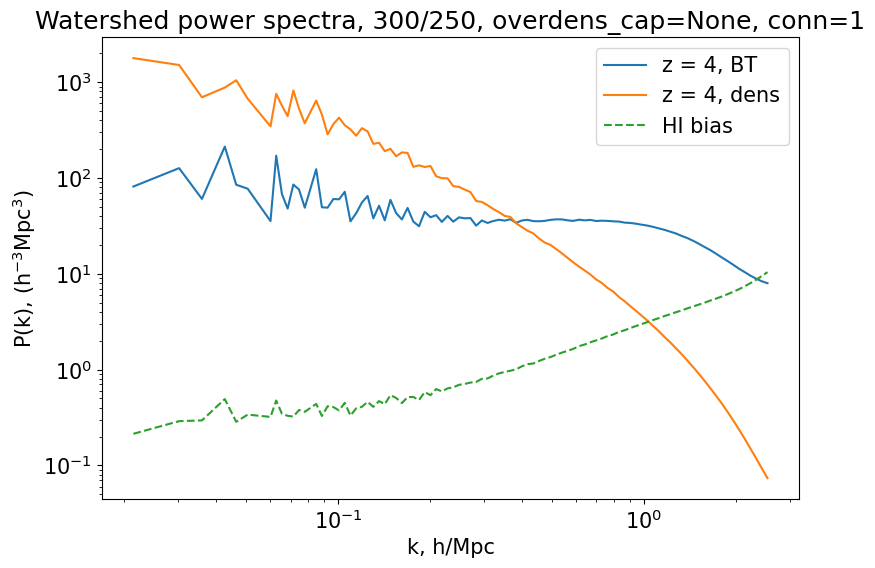

In [ ]:
k, PS, err = box.get_PS("BT", color="tab:blue", norm=True)
box.density_field -= 1
_, dens_ps, _ = box.get_PS("dens", color="tab:orange", title="Watershed power spectra, 300/250, overdens_cap=None, conn=1")

k, bias = box.get_bias()
plt.plot(k, bias, color="tab:green", linestyle="--", label="HI bias")

plt.yscale("log")
plt.xscale("log")
plt.xlabel("k, h/Mpc")
plt.ylabel("P(k), (h$^{-3}$Mpc$^3$)")
plt.legend()

# Checking density parameter

We calculate the dimensionless HI density parameter $\Omega_{HI}$ below.

In [ ]:
print(box.get_omega_HI())

0.0006082684611383492


# Including observational effects

We first generate an example survey, based off of the parameters of the SKA1-low deep survey (SKA red book 2018).

In [ ]:
import postEoR.observations as obs

AA4 = obs.SKA1LOW_AA4(0)
AAstar = obs.SKA1LOW_AAstar(0)

some_survey = obs.Interferometer(AA4, 4.1, 3.9, 100, 5000, 0, 10e6)

comp_survey = obs.Interferometer(AAstar, 4.1, 3.9, 100, 5000, 0, 50e6)

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)
/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be

We now plot the predicted uncertainty from thermal noise of the HI power spectrum of the previously-generated box.

Generated bins.
10000000.0
50000000.0


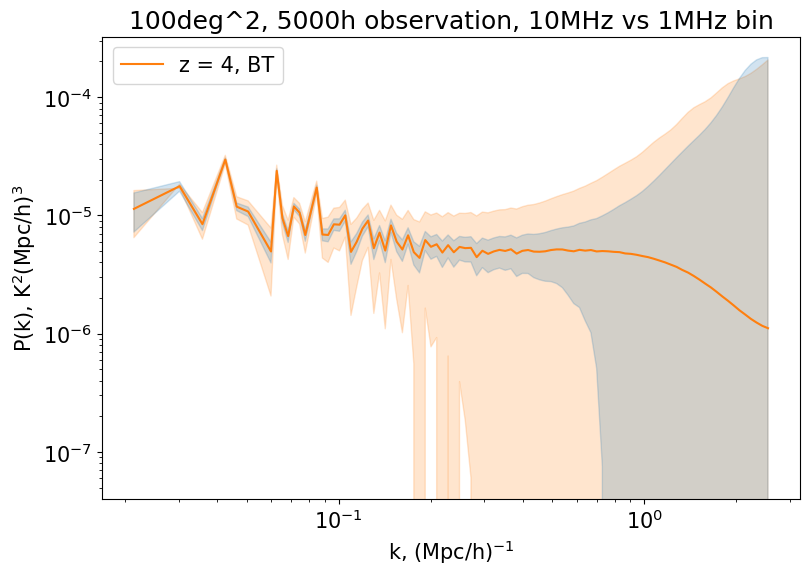

In [ ]:
from scipy.interpolate import make_interp_spline

n = np.size(box.density_field)

BT_k, BT_ps, _ = box.get_PS("BT", norm=False, color="tab:orange")
ps, k_perp = some_survey.noise_power_perp(box.z)
noise = make_interp_spline(k_perp, ps)
plt.fill_between(BT_k, BT_ps - noise(BT_k), BT_ps + noise(BT_k), alpha=0.2, color="tab:orange")
ps, k_perp = comp_survey.noise_power_perp(box.z)
noise = make_interp_spline(k_perp, ps)
plt.fill_between(BT_k, BT_ps - noise(BT_k), BT_ps + noise(BT_k), alpha=0.2, color="tab:blue")
plt.ylabel("P(k), K$^2$(Mpc/h)$^3$")
plt.title("100deg^2, 5000h observation, 10MHz vs 1MHz bin")
plt.legend()

# SNR evolution

We also plot the SNR directly across redshift.

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/py21cmfast/inputs.py:519: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(


Optimal overdensity cap used is 7.997999999999999
12153
crit dens 5.8160395484597314e-27
min mass of cell before halos 2665549532.0960298
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
Generated bins.
Optimal overdensity cap used is 7.997999999999999
11944
crit dens 5.8160395484597314e-27
min mass of cell before halos 2665547360.113332
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt t

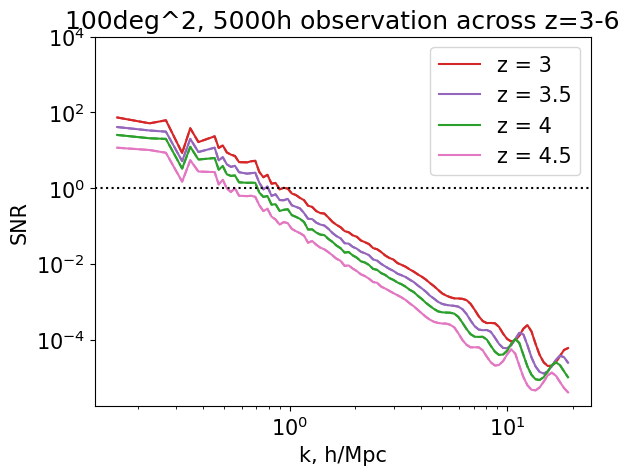

In [ ]:
from scipy.interpolate import make_interp_spline

box = gen.generate_box(3, 250, 40, normalise_halos=True)
BT_k, BT_ps, _ = box.get_PS("BT", norm=False, save_fig=False)
ps, k_perp = some_survey.noise_power_perp(box.z)
ps1, k_1 = comp_survey.noise_power_perp(box.z)
spl = make_interp_spline(k_perp, ps)
spl1 = make_interp_spline(k_1, ps1)
snr = BT_ps / spl(BT_k)
plt.plot(BT_k, snr, color="tab:red", label="z = 3")
snr1 = BT_ps / spl(BT_k)
plt.plot(BT_k, snr1, color="tab:red", linestyle="--")
box = gen.generate_box(3.5, 250, 40, normalise_halos=True)
BT_k, BT_ps, _ = box.get_PS("BT", norm=False, save_fig=False)
ps, k_perp = some_survey.noise_power_perp(box.z)
ps1, k_1 = comp_survey.noise_power_perp(box.z)
spl = make_interp_spline(k_perp, ps)
spl1 = make_interp_spline(k_1, ps1)
snr = BT_ps / spl(BT_k)
plt.plot(BT_k, snr, color="tab:purple", label="z = 3.5")
snr1 = BT_ps / spl(BT_k)
plt.plot(BT_k, snr1, color="tab:purple", linestyle="--")
box = gen.generate_box(4, 250, 40, normalise_halos=True)
BT_k, BT_ps, _ = box.get_PS("BT", norm=False, save_fig=False)
ps, k_perp = some_survey.noise_power_perp(box.z)
ps1, k_1 = comp_survey.noise_power_perp(box.z)
spl = make_interp_spline(k_perp, ps)
spl1 = make_interp_spline(k_1, ps1)
snr = BT_ps / spl(BT_k)
plt.plot(BT_k, snr, color="tab:green", label="z = 4")
snr1 = BT_ps / spl(BT_k)
plt.plot(BT_k, snr1, color="tab:green", linestyle="--")
box = gen.generate_box(4.5, 250, 40, normalise_halos=True)
BT_k, BT_ps, _ = box.get_PS("BT", norm=False, save_fig=False)
ps, k_perp = some_survey.noise_power_perp(box.z)
ps1, k_1 = comp_survey.noise_power_perp(box.z)
spl = make_interp_spline(k_perp, ps)
spl1 = make_interp_spline(k_1, ps1)
snr = BT_ps / spl(BT_k)
snr1 = BT_ps / spl(BT_k)
plt.plot(BT_k, snr, color="tab:pink", label="z = 4.5")
plt.plot(BT_k, snr1, color="tab:pink", linestyle="--")

plt.axhline(y = 1, color = 'k', linestyle = ':')
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("k, h/Mpc")
plt.ylabel("SNR")
plt.title("100deg^2, 5000h observation across z=3-6")
plt.ylim(top=1e4)
plt.show()

# Bias evolution

Optimal overdensity cap used is -16.07
488947
crit dens 5.8160395484597314e-27
min mass of cell before halos 1000958556.0459232
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
Using input bins
Using input bins
Optimal overdensity cap used is -16.07
478016
crit dens 5.8160395484597314e-27
min mass of cell before halos 1814191280.3837414
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to

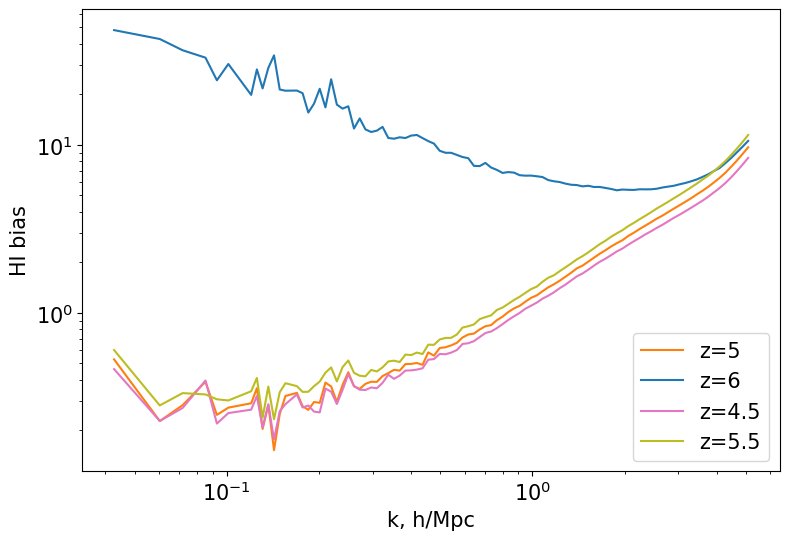

In [ ]:
box = gen.generate_box(5, 250, 150)
k, bias = box.get_bias()
plt.plot(k, bias, label="z=5", color="tab:orange")
box = gen.generate_box(6, 250, 150)
k, bias = box.get_bias()
plt.plot(k, bias, label="z=6", color="tab:blue")
box = gen.generate_box(4.5, 250, 150)
k, bias = box.get_bias()
plt.plot(k, bias, label="z=4.5", color="tab:pink")
box = gen.generate_box(5.5, 250, 150)
k, bias = box.get_bias()
plt.plot(k, bias, label="z=5.5", color="tab:olive")

plt.rcParams['figure.figsize'] = [9, 6]

plt.ylabel("HI bias")
plt.xlabel("k, h/Mpc")
plt.legend()
plt.xscale("log")
plt.yscale("log")

# $\Omega_{\text{HI}}$ evolution

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/py21cmfast/inputs.py:519: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(


Optimal overdensity cap used is 7.997999999999999
19549
crit dens 5.8160395484597314e-27
min mass of cell before halos 2665549532.0960298
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
[0.00251918]
[3.]
Optimal overdensity cap used is 7.997999999999999
19231
crit dens 5.8160395484597314e-27
min mass of cell before halos 2665547360.113332
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt

Text(0.5, 1.0, '$\\Omega_{HI}$ evolution')

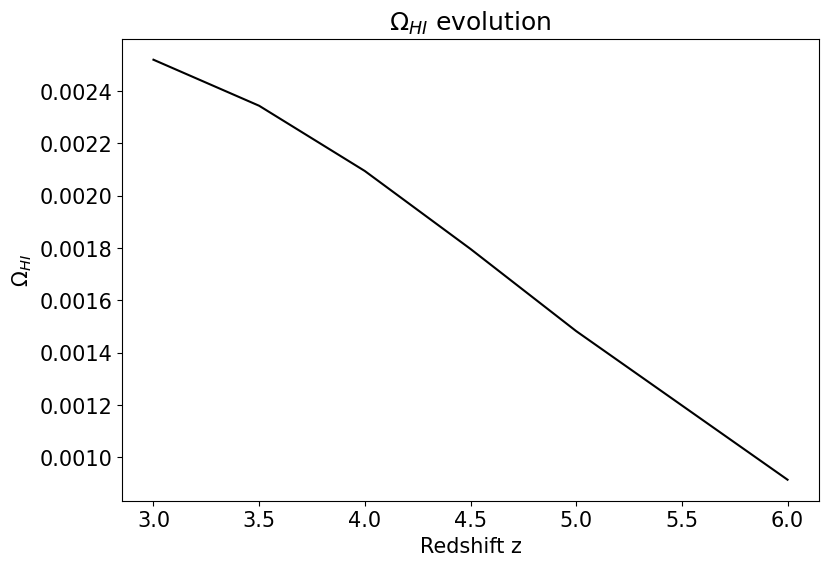

In [ ]:
redshifts = np.array([])
omegas = np.array([])

box = gen.generate_box(3, 250, 40, normalise_halos=True)
redshifts = np.append(redshifts, box.z)
omegas = np.append(omegas, box.get_omega_HI())
print(omegas)
print(redshifts)
box = gen.generate_box(3.5, 250, 40, normalise_halos=True)
redshifts = np.append(redshifts, box.z)
omegas = np.append(omegas, box.get_omega_HI())
box = gen.generate_box(4, 250, 40, normalise_halos=True)
redshifts = np.append(redshifts, box.z)
omegas = np.append(omegas, box.get_omega_HI())
box = gen.generate_box(4.5, 250, 40, normalise_halos=True)
redshifts = np.append(redshifts, box.z)
omegas = np.append(omegas, box.get_omega_HI())
box = gen.generate_box(5, 250, 40, normalise_halos=True)
redshifts = np.append(redshifts, box.z)
omegas = np.append(omegas, box.get_omega_HI())
box = gen.generate_box(6, 250, 40, normalise_halos=True)
redshifts = np.append(redshifts, box.z)
omegas = np.append(omegas, box.get_omega_HI())

plt.rcParams['figure.figsize'] = [9, 6]
plt.plot(redshifts, omegas, color="k")
plt.ylabel("$\Omega_{HI}$")
plt.xlabel("Redshift z")
plt.title("$\Omega_{HI}$ evolution")


In [ ]:
print(omegas)

[0.00251918 0.00234336 0.00209415 0.00179645 0.00148264 0.00091504]


# Evolution of the HMF with cell resolution

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/py21cmfast/inputs.py:519: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
2025-05-22 18:38:12,610 | WARNING | inputs.py::validate_all_inputs() | Your R_BUBBLE_MAX is > BOX_LEN/3 (50 > 19.706375012316485).


Optimal overdensity cap used is 8
14033
crit dens 5.8160395484597314e-27
min mass of cell before halos 2666154810.8840823
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve


/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/hmf/density_field/transfer_models.py:233: UserWarning: 'extrapolate_with_eh' was not set. Defaulting to True, which is different behaviour than versions <=3.4.4. This warning may be removed in v4.0. Silence it by setting extrapolate_with_eh explicitly.
  warnings.warn(
2025-05-22 18:44:57,360 | WARNING | inputs.py::validate_all_inputs() | Your R_BUBBLE_MAX is > BOX_LEN/3 (50 > 24.632968765395606).


Optimal overdensity cap used is 8
12066
crit dens 5.8160395484597314e-27
min mass of cell before halos 5207332654.639824
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve


2025-05-22 18:50:59,835 | WARNING | inputs.py::validate_all_inputs() | Your R_BUBBLE_MAX is > BOX_LEN/3 (50 > 29.559562518474724).


Optimal overdensity cap used is 8
10386
crit dens 5.8160395484597314e-27
min mass of cell before halos 8998449949.645622
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve


2025-05-22 18:55:58,917 | WARNING | inputs.py::validate_all_inputs() | Your R_BUBBLE_MAX is > BOX_LEN/3 (50 > 34.486156271553845).


Optimal overdensity cap used is 8
8692
crit dens 5.8160395484597314e-27
min mass of cell before halos 14288887502.179157
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve


2025-05-22 19:00:08,424 | WARNING | inputs.py::validate_all_inputs() | Your R_BUBBLE_MAX is > BOX_LEN/3 (50 > 39.41275002463297).


Optimal overdensity cap used is 8
7295
crit dens 5.8160395484597314e-27
min mass of cell before halos 21329229574.03666
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve


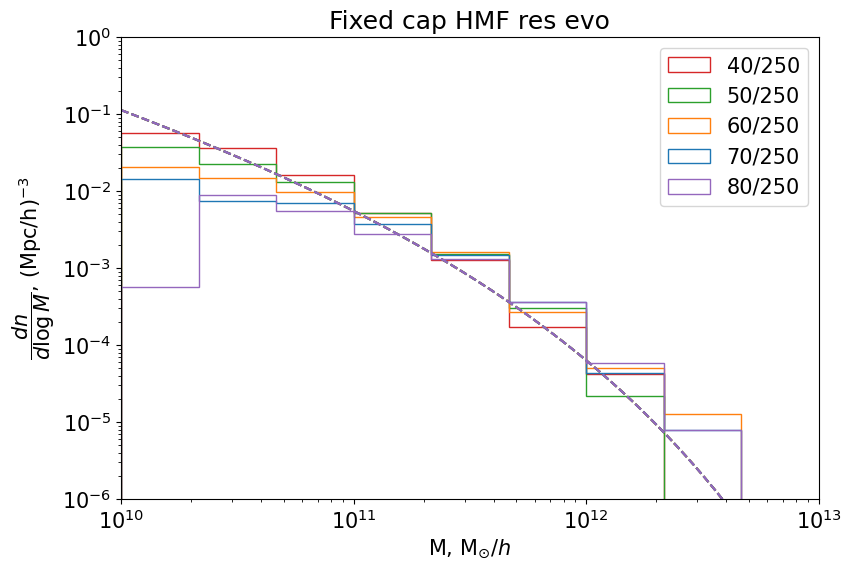

In [ ]:
# hmf evo with resolution

box = gen.generate_box(5, 250, 40, overdens_cap=None, connectivity=1, normalise_halos=False, max_rad=0)
box.gen_hmf(title="Fixed cap HMF res evo", Mmax=13, Mmin=10, color="tab:red", linestyle="--", label="40/250")
box = gen.generate_box(5, 250, 50, overdens_cap=None, connectivity=1, normalise_halos=False, max_rad=0)
box.gen_hmf(title="Fixed cap HMF res evo", Mmax=13, Mmin=10, color="tab:green", linestyle="--", label="50/250")
box = gen.generate_box(5, 250, 60, overdens_cap=None, connectivity=1, normalise_halos=False, max_rad=0)
box.gen_hmf(title="Fixed cap HMF res evo", Mmax=13, Mmin=10, color="tab:orange", linestyle="--", label="60/250")
box = gen.generate_box(5, 250, 70, overdens_cap=None, connectivity=1, normalise_halos=False, max_rad=0)
box.gen_hmf(title="Fixed cap HMF res evo", Mmax=13, Mmin=10, color="tab:blue", linestyle="--", label="70/250")
box = gen.generate_box(5, 250, 80, overdens_cap=None, connectivity=1, normalise_halos=False, max_rad=0)
box.gen_hmf(title="Fixed cap HMF res evo", Mmax=13, Mmin=10, color="tab:purple", linestyle="--", label="80/250")
plt.ylim(1e-6, 1e-0)
plt.xlim(1e10, 1e13)
plt.show()